# Estudo e caracterização de filtros RC

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.optimize import curve_fit

In [78]:
sns.set_theme()

## Componentes e funções

In [79]:
R = 985.9, 1   # Ohm
C = 0.47E-6   # Farad

In [80]:
cutoff = 1 / (2*np.pi*R[0]*C)

In [81]:
cutoff

343.4704721507195

In [82]:
G_alta  = lambda w, w0: 1 / np.sqrt(1 + (w0/w)**2)
G_baixa = lambda w, w0: 1 / np.sqrt(1 + (w/w0)**2)

## Passa Baixa

In [83]:
df_baixa = pd.read_csv('baixa.csv', sep='\t')

In [84]:
popt, pcov = curve_fit(
    G_baixa,
    xdata=df_baixa['Frequencia'],
    ydata=df_baixa['Ganho'],
    sigma=df_baixa['sGanho'],
    p0=[ cutoff ]
)

In [85]:
popt, np.sqrt(pcov)

(array([358.56525509]), array([[3.02364572]]))

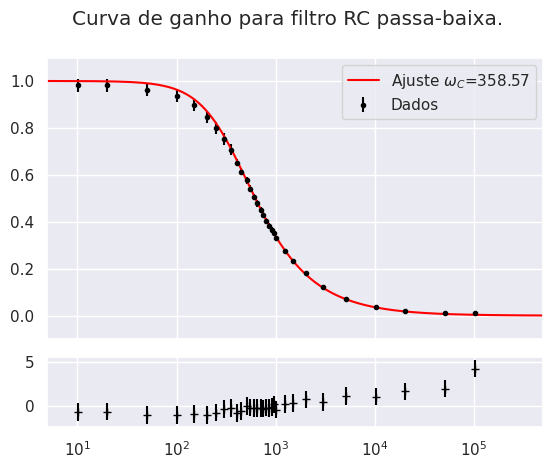

In [86]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={ 'hspace': 0.1, 'height_ratios': (4, 1) })
plt.suptitle('Curva de ganho para filtro RC passa-baixa.')

axs[0].errorbar(
    x=df_baixa['Frequencia'],
    y=df_baixa['Ganho'],
    yerr=df_baixa['sGanho'],
    fmt=' ', marker='.', color='black', label='Dados'
)

x = np.linspace(5E0, 5E5, 100000)
sns.lineplot(x=x, y=G_baixa(x, popt[0]), color='red', ax=axs[0], label='Ajuste $\\omega_C$={:.2f}'.format(popt[0]))

axs[1].errorbar(
    x=df_baixa['Frequencia'],
    y=(df_baixa['Ganho'] - G_baixa(df_baixa['Frequencia'], popt[0])) / df_baixa['sGanho'],
    yerr=1,
    fmt=' ', marker='+', color='black'
)

axs[0].legend()
axs[0].set_ylim(-0.1, 1.1)

axs[1].set_xscale('log')
axs[1].set_xlim(5E0, 5E5)

plt.savefig('plot_low_pass.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [87]:
np.sum((df_baixa['Ganho'] - G_baixa(df_baixa['Frequencia'], popt[0]))**2 / df_baixa['sGanho']**2 ) / df_baixa.shape[0]

1.1389845543844872

## Passa Alta

In [88]:
df_alta = pd.read_csv('alta.csv', sep='\t')

In [89]:
popt, pcov = curve_fit(
    G_alta,
    xdata=df_alta['Frequencia'],
    ydata=df_alta['Ganho'],
    p0=[ cutoff ]
)

In [90]:
popt[0], np.sqrt(pcov)[0][0]

(382.9057007157794, 3.983155712758854)

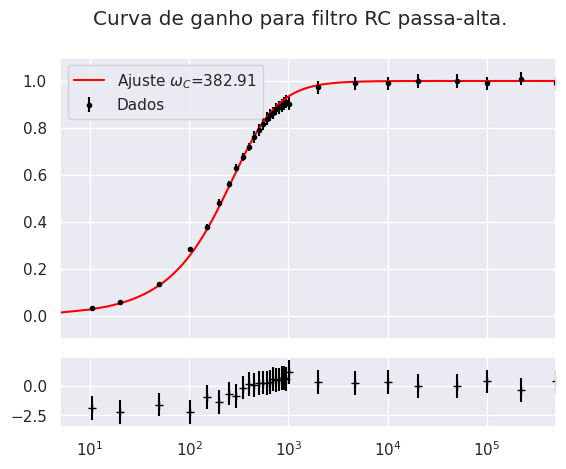

In [91]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={ 'hspace': 0.1, 'height_ratios': (4, 1) })
plt.suptitle('Curva de ganho para filtro RC passa-alta.')

axs[0].errorbar(
    x=df_alta['Frequencia'],
    y=df_alta['Ganho'],
    yerr=df_alta['sGanho'],
    fmt=' ', marker='.', color='black', label='Dados'
)

x = np.linspace(5E0, 5E5, 100000)
sns.lineplot(x=x, y=G_alta(x, popt[0]), color='red', ax=axs[0], label='Ajuste $\\omega_C$={:.2f}'.format(popt[0]))

axs[1].errorbar(
    x=df_alta['Frequencia'],
    y=(G_alta(df_alta['Frequencia'], popt[0]) - df_alta['Ganho']) / df_alta['sGanho'],
    yerr=1,
    fmt=' ', marker='+', color='black'
)

axs[0].legend()
axs[0].set_ylim(-0.1, 1.1)

axs[1].set_xscale('log')
axs[1].set_xlim(5E0, 5E5)

plt.savefig('plot_high_pass.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [92]:
np.sum((df_alta['Ganho'] - G_alta(df_baixa['Frequencia'], popt[0]))**2 / df_alta['sGanho']**2 ) / df_alta.shape[0]

0.8846340421568611

# Monte Carlo